In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as math
import seaborn as sns
#from jupyterthemes import jtplot
#jtplot.style()
#jtplot.style(theme='onedork')
import random
from datetime import datetime
%matplotlib inline
#%pylab inline

# Implementacja LFG i generowanie rozkładu normlanego na ich podstawie

seed: [720, 185, 216, 96, 466, 117, 628, 998, 627, 568, 263, 256, 841, 533, 460, 882, 730, 136, 483, 956, 649, 512, 663, 761, 905, 293, 198, 253, 279, 904, 11, 60, 780, 965, 181, 277, 743, 860, 488, 486, 113, 681, 944, 200, 41, 574, 34, 916, 646, 782, 265, 221, 870, 382, 45] seed len: 55 
len lfg_num: 30000 
sJ: 761 sK: 45


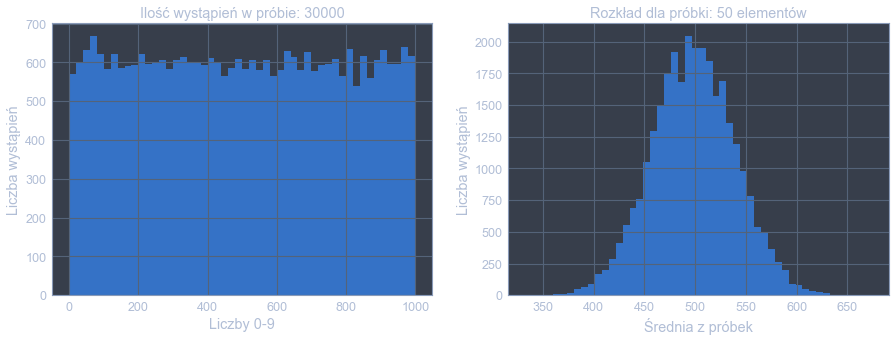

In [34]:
# generowanie liczb losowych na podstawie LFG

LFGpop = 2000000 # wielkość populacji

# losowy wiersz początkowy na podstawie milisekund
millis = int(round(time.time() * 1000000000000000000000000000000000000000000000))
seed = list(map(int, str(millis)))

j = 24
k = 55
s = seed

lfg_num =[]

for n in range(int(LFGpop)):
        op = (s[j-1] + s[k-1]) % 1000 # wynik
        lfg_num.append(op)
        s.append(op)
        s.pop(0)

LFGsample = 50 #wielkość próbki
lfg_num_norm = []
x2=0

while x2 < len(lfg_num):
    avg = round((sum(random.sample(lfg_num,LFGsample)))/LFGsample)
    lfg_num_norm.append( avg )
    x2+=1

# wykresy
plt.rcParams['axes.grid'] = True
f = plt.figure(figsize=(15,5))
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)


ax.hist(lfg_num,bins=50)
ax.title.set_text("Ilość wystąpień w próbie: " + str(LFGpop))
ax.set_ylabel("Liczba wystąpień")
ax.set_xlabel("Liczby 0-1000")

ax2.hist(lfg_num_norm,bins=50)
ax2.title.set_text("Rozkład dla próbki: " + str(LFGsample) + " elementów")
ax2.set_ylabel("Liczba wystąpień")
ax2.set_xlabel("Średnia z próbek")

print('seed: ' + str(seed), 'seed len: ' + str(len(seed)), 
      #'\nseed7: ' + str(seed7), 'seed7 len: ' + str(len(seed7)), 
      '\nlen lfg_num: '+str(len(lfg_num)), 
      '\nsJ: ' +str(s[j-1]), 'sK: '+ str(s[k-1]))

# Generowanie liczb losowych Pythona i generowanie rozkładu normalnego na ich podstawie

In [19]:
len(rand_num)

300

Text(0.5,0,'Średnia z próbek')

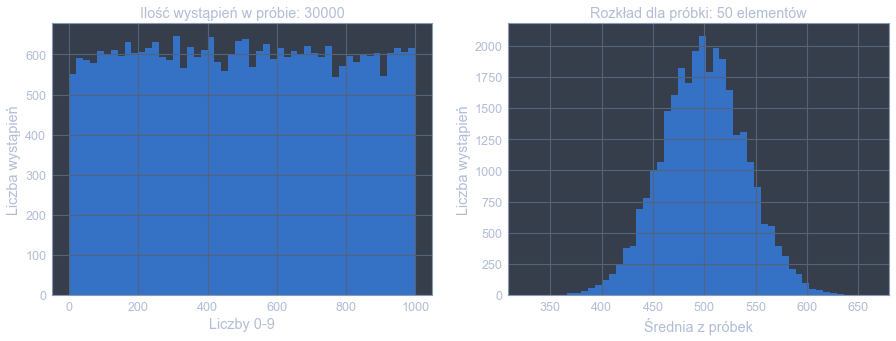

In [27]:
# generowanie liczb losowych Pythona
PythPop= 2000000
rand_num = []

for i in range(0,int(PythPop)):
    pyth = round(random.uniform(0,999))
    rand_num.append(pyth)

# wybieranie próbek do rozkładu normlanego z listy Pythona

PythSample = 50
rand_num_norm = []
x3=0

while x3 < len(rand_num):
   avg = round((sum(random.sample(rand_num,PythSample )))/PythSample)
   rand_num_norm.append( avg )
   x3+=1

# wykresy

f = plt.figure(figsize=(15,5))
ax3 = f.add_subplot(121)
ax4 = f.add_subplot(122)

ax3.hist(rand_num,bins=50)
ax3.title.set_text("Ilość wystąpień w próbie: " + str(PythPop))
ax3.set_ylabel("Liczba wystąpień")
ax3.set_xlabel("Liczby 0-1000")

ax4.hist(rand_num_norm,bins=50)
ax4.title.set_text("Rozkład dla próbki: " + str(PythSample) + " elementów")
ax4.set_ylabel("Liczba wystąpień")
ax4.set_xlabel("Średnia z próbek")

# Testowanie rozkładów

T-Student dla niezależnych grup 

In [13]:
from scipy.stats import ttest_ind
from scipy import stats
from scipy.stats import t

In [28]:
# źródło https://machinelearningmastery.com/how-to-code-the-students-t-test-from-scratch-in-python/

def independent_ttest(lfg_num_norm, rand_num_norm, alpha):
    # calculate means
    mean1, mean2 = mean(lfg_num_norm), mean(rand_num_norm)
    # calculate standard errors
    se1, se2 = stats.sem(lfg_num_norm), stats.sem(rand_num_norm)
    # standard error on the difference between the samples
    sed = sqrt(se1**2.0 + se2**2.0)
    # calculate the t statistic
    t_stat = (mean1 - mean2) / sed
    # degrees of freedom
    df = len(lfg_num_norm) + len(rand_num_norm) - 2
    # calculate the critical value
    cv = t.ppf(1.0 - alpha, df)
    # calculate the p-value
    p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0
    # return everything
    return t_stat, df, cv, p

alpha = 0.05
t_stat, df, cv, p = independent_ttest(lfg_num_norm, rand_num_norm, alpha)
print('t=%.3f, df=%d, cv=%.3f, p=%.3f' % (t_stat, df, cv, p))
# interpret via critical value
if abs(t_stat) <= cv:
    print('Accept null hypothesis that the means are equal. T_stat <= cv')
else:
    print('Reject the null hypothesis that the means are equal. T_stat > cv')
# interpret via p-value
if p > alpha:
    print('Accept null hypothesis that the means are equal. p > alpha')
else:
    print('Reject the null hypothesis that the means are equal. p <= alpha')

t=2.697, df=59998, cv=1.645, p=0.007
Reject the null hypothesis that the means are equal. T_stat > cv
Reject the null hypothesis that the means are equal. p <= alpha


# Chisquare

In [29]:
#http://specminor.org/2017/01/08/performing-chi-squared-gof-python.html
from collections import Counter
from scipy.stats import chisquare

lfg_num_np = np.array(lfg_num) # ciąg liczb z LFG
rand_num_np = np.array(rand_num) # ciąg liczb z pythona

#zliczanie wystapień poszczególnych liczb counterem
lfg_num_count = Counter(lfg_num_np)
rand_num_count = Counter(rand_num_np)

#zliczanie wystapień poszczególnych liczb numpy'em i tworzenie z nich dictów
unique, counts = np.unique(lfg_num_np, return_counts=True)
lfg_num_dict = dict(zip(unique, counts))

unique, counts = np.unique(rand_num_np, return_counts=True)
rand_num_dict = dict(zip(unique, counts))

#wyciąganie z dictów wartości
lfg_num_dict_vlist = list(lfg_num_dict.values())
rand_num_dict_vlist = list(rand_num_dict.values())

#statystyka Chi^2
chisquare(lfg_num_dict_vlist, f_exp=rand_num_dict_vlist)

Power_divergenceResult(statistic=2073.9749537836983, pvalue=1.7812885636994917e-77)

In [30]:
#http://hamelg.blogspot.com/2015/11/python-for-data-analysis-part-25-chi.html
# robienie z dictów data framów i transpozycja
lfg_num_df = pd.DataFrame.from_dict([lfg_num_dict])
lfg_num_dfT = lfg_num_df.T

rand_num_df = pd.DataFrame.from_dict([rand_num_dict])
rand_num_dfT = rand_num_df.T

#nazywanie kolumn
lfg_num_dfT = lfg_num_dfT.rename(columns={0:'count'})
rand_num_dfT = rand_num_dfT.rename(columns={0:'count'})

#zebranie danych do wzoru na statystykę Chi^2
observed = lfg_num_dfT
rand_num_ratio = rand_num_dfT/len(rand_num_dfT)
expected = rand_num_ratio * len(lfg_num_dfT)
chi_squared_stat = (((observed-expected)**2)/expected).sum()

# liczenie p-value
crit = stats.chi2.ppf(q = 0.95, # Find the critical value for 95% confidence*
                      df = 9)   # Df = number of variable categories - 1

p_value = 1 - stats.chi2.cdf(x=chi_squared_stat,  # Find the p-value
                             df=9)

print('Chi^2 stat: ' + str(chi_squared_stat))
print("Critical value :" + str(crit))
print("P value" + str(p_value))
stats.chisquare(f_obs= observed,   # Array of observed counts
                f_exp= expected)   # Array of expected counts

Chi^2 stat: count    2073.974954
dtype: float64
Critical value :16.918977604620448
P value[0.]


Power_divergenceResult(statistic=array([2073.97495378]), pvalue=array([1.78128856e-77]))